# Motivation for Implicit Time Integration
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

In [1]:
import numpy as np
from numpy import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

# Solve the following initial value problem using the Forward Euler method
Solve the ODE:
\begin{equation}
\frac{\text{d}y}{\text{d}t} = -ay;\quad y(0) = y_0
\end{equation}
The analytical solution is 
\begin{equation}
y(t) = y_0 e^{-a t}
\end{equation}

We first define the RHS for this ODE

In [2]:
a = 1000.0
def rhs_sharp_transient(f, t):
    return - a * f

we now plot it

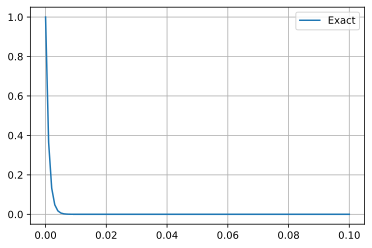

In [3]:
yexact = lambda a,y0,t : y0 * np.exp(-a*t)
t = linspace(0,0.1,100)
y0 = 1
plt.plot(t,yexact(1000,y0,t),label='Exact')
plt.legend()
plt.grid()
# plt.savefig('sharp-transient-exact.pdf')

# Using Forward Euler
Using the forward Euler method, solve the above ODE using various timestep sizes, starting with $\Delta t = 0.003$.

In [4]:
def forward_euler(rhs, f0, tend, dt):
    ''' Computes the forward_euler method '''
    nsteps = int(tend/dt)
    f = np.zeros(nsteps)
    f[0] = f0
    time = np.linspace(0,tend,nsteps)
    for n in np.arange(nsteps-1):
        f[n+1] = f[n] + dt * rhs(f[n], time[n])
    return time, f

dt 0.0005


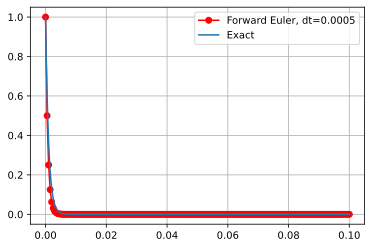

In [8]:
f0 = 1.0
tend = 0.1
dt = 0.0005
# dt = 2.0/a
# dt = 0.5*dt
print('dt',dt)
# a = 1000
t,ffe = forward_euler(rhs_sharp_transient,f0, tend, dt)
plt.plot(t,ffe,'r-o',label='Forward Euler, dt='+str(dt))

texact = np.linspace(0,tend,400)
plt.plot(texact,yexact(a,f0,texact),label='Exact')
plt.legend()
plt.grid()
plt.savefig('motivation for implicit dt='+str(dt)+'.pdf')

# Using Backward Euler

In [9]:
def be_residual(fnp1, rhs, fn, dt, tnp1):
    '''
    Nonlinear residual function for the backward Euler implicit time integrator
    '''    
    return fnp1 - fn - dt * rhs(fnp1, tnp1)

def backward_euler(rhs, f0, tend, dt):
    ''' 
    Computes the backward euler method 
    :param rhs: a rhs function
    '''
    nsteps = int(tend/dt)
    f = np.zeros(nsteps)
    f[0] = f0
    time = np.linspace(0,tend,nsteps)
    for n in np.arange(nsteps-1):
        fn = f[n]
        tnp1 = time[n+1]
        fnew = fsolve(be_residual, fn, (rhs, fn, dt, tnp1))
        f[n+1] = fnew
    return time, f

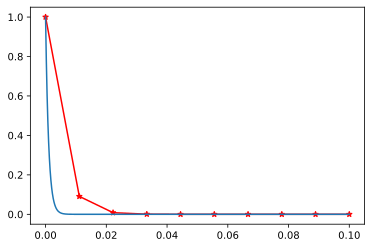

In [18]:
f0 = 1.0
tend = 0.1
dt = 0.01

t,fbe = backward_euler(rhs_sharp_transient, f0, tend, dt)
plt.plot(t,fbe, 'r*-',label='Backward Euler')

texact = np.linspace(0,tend,400)
plt.plot(texact,yexact(a,f0,texact),label='Exact')

# Using Crank-Nicolson

In [18]:
def cn_residual(fnp1, rhs, fn, dt, tnp1, tn):
    '''
    Nonlinear residual function for the Crank-Nicolson implicit time integrator
    '''
    return fnp1 - fn - 0.5 * dt * ( rhs(fnp1, tnp1) + rhs(fn, tn) )

def crank_nicolson(rhs,f0,tend,dt):
    nsteps = int(tend/dt)
    f = np.zeros(nsteps)
    f[0] = f0
    time = np.linspace(0,tend,nsteps)
    for n in np.arange(nsteps-1):
        fn = f[n]
        tnp1 = time[n+1]
        tn = time[n]
        fnew = fsolve(cn_residual, fn, (rhs, fn, dt, tnp1, tn))
        f[n+1] = fnew
    return time, f

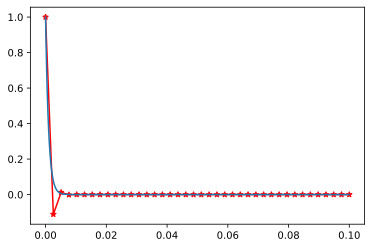

In [19]:
f0 = 1.0
tend = 0.1
dt = 0.0025

t,fcn = crank_nicolson(rhs_sharp_transient, f0, tend, dt)
plt.plot(t,fcn, 'r*-',label='Backward Euler')

texact = np.linspace(0,tend,400)
plt.plot(texact,yexact(a,f0,texact),label='Exact')

# Using odeint

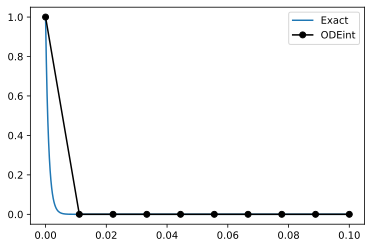

In [20]:
time = np.linspace(0,0.1,10)
sol = odeint(rhs_sharp_transient,f0,time)
texact = np.linspace(0,tend,400)
plt.plot(texact,yexact(a,f0,texact),label='Exact')
plt.plot(time,sol, 'k-o', label='ODEint')
plt.legend()